# 6. Paths

In [1]:
import drawsvg as dw

## 6.1 moveto, lineto and closepath

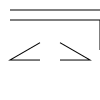

In [2]:
d = dw.Drawing(100,100)
g = dw.Group(stroke='black',fill='none')

p1 = dw.Path()
p1.M(10,10)
p1.L(100,10)
g.append(p1)

p2 = dw.Path()
p2.M(10,20)
p2.L(100,20)
p2.L(100,50)
g.append(p2)

p3 = dw.Path()
p3.M(40,60)
p3.L(10,60)
p3.L(40,42.68)
p3.M(60,60)
p3.L(90,60)
p3.L(60,42.68)
g.append(p3)

d.append(g)
d

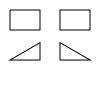

In [3]:
d = dw.Drawing(100,100)
g = dw.Group(stroke='black',fill='none')

# rectangle: all four lines
p = dw.Path()
p.M(10,10)
p.L(40,10)
p.L(40,30)
p.L(10,30)
p.L(10,10)
g.append(p)

# rectangle with closepath
p = dw.Path()
p.M(60,10)
p.L(90,10)
p.L(90,30)
p.L(60,30)
p.Z()
g.append(p)

# two thirty-degree triangles
p = dw.Path()
p.M(40,60)
p.L(10,60)
p.L(40,42.68)
p.Z()
p.M(60,60)
p.L(90,60)
p.L(60,42.68)
p.Z()
g.append(p)

d.append(g)
d

## 6.2 Relative moveto and lineto

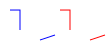

In [4]:
d = dw.Drawing(110,50)
p = dw.Path(stroke='blue',fill='none')
p.M(10,10).L(20,10).L(20,30).M(40,40).L(55,35)
d.append(p)
p = dw.Path(stroke='red',fill='none',transform='translate(50 0)')
p.M(10,10).l(10,0).l(0,20).m(20,10).l(15,-5)
d.append(p)
d

## 6.3 Path Shortcuts

### 6.3.1 The Horizontal lineto and the Vertical lineto Commands

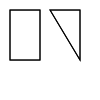

In [5]:
d = dw.Drawing(100,100)
p = dw.Path(stroke='black',fill='none')
d.append(p.M(10,10).h(30).v(50).h(-30).Z())
d.append(p.M(50,10).h(30).v(50).Z())
d

### 6.3.2 Notational Shortcuts
This does not work in draw2Svg, as M() or L() only take two arguments, not more.

## 6.4 Elliptical Arc

In [7]:
d = dw.Drawing(400,200,stroke_width=3,fill='none')
# referring to figure 6.4 in "svg essentials" 

p = dw.Path(stroke='red')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=0,sweep=0,ex=225,ey=125))

p = dw.Path(stroke='blue')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=0,sweep=1,ex=225,ey=125))

p = dw.Path(stroke='rgb(0 80 255)',stroke_dasharray='5 3')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=1,sweep=0,ex=225,ey=125))

p = dw.Path(stroke='rgb(255 80 0)',stroke_dasharray='5 3')
d.append(p.M(125,75).A(100,50,rot=0,large_arc=1,sweep=1,ex=225,ey=125))

d

## 6.6 Bézier Curves

### 6.6.1 Quadratic Bézier Curves

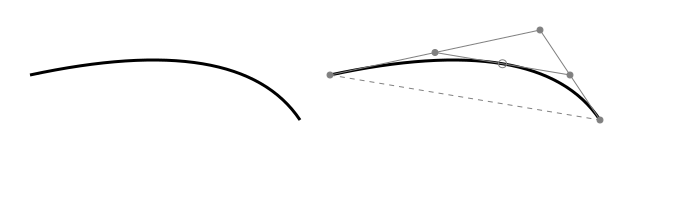

In [8]:
d = dw.Drawing(700,200)
# curve only (left)
p = dw.Path(stroke='black',fill='none',stroke_width=3)
d.append(p.M(30,75).Q(240,30,300,120))
# with control point and construction lines
d.append(dw.Use(p,300,0))
g = dw.Group(stroke='gray',fill='gray')
g.append(dw.Circle(330,75,3))
g.append(dw.Circle(600,120,3))
g.append(dw.Circle(540,30,3))
g.append(dw.Line(330,75,540,30))
g.append(dw.Line(540,30,600,120))
g.append(dw.Line(330,75,600,120,stroke_dasharray='5,5'))
g.append(dw.Circle(435,52.5,3))
g.append(dw.Circle(570,75,3))
g.append(dw.Line(435,52.5,570,75))
g.append(dw.Circle(502.5,63.75,4,fill='none'))
d.append(g)
d

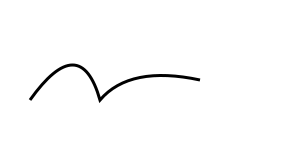

In [9]:
d = dw.Drawing(300,150)
p = dw.Path(stroke='black',fill='none',stroke_width=3)
# several quadratic bezier in sequence
p.M(30,100).Q(80,30,100,100).Q(130,65,200,80)
d.append(p)
d

`T` statement as smooth continuation with automatically generated control point:

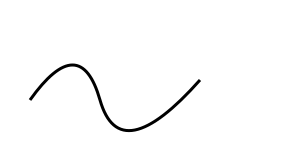

In [10]:
d = dw.Drawing(300,150)
p = dw.Path(stroke='black',fill='none',stroke_width=3)
p.M(30,100).Q(80,30,100,100).T(200,80)
d.append(p)
d

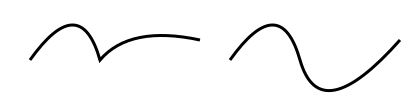

In [11]:
d = dw.Drawing(410,100)
# sequence left
p = dw.Path(stroke='black',fill='none',stroke_width=3)
d.append(p.M(30,60).Q(80,-10,100,60).Q(130,25,200,40))
# with smooth continuation right
p = dw.Path(stroke='black',fill='none',stroke_width=3,transform='translate(200,0)')
d.append(p.M(30,60).Q(80,-10,100,60).T(200,40))
d

### 6.6.2 Cubic Bézier Curves
Usage: startpoint, control for startpoint, control for endpoint, endpoint

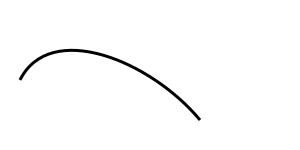

In [12]:
d = dw.Drawing(300,150)
p = dw.Path(stroke='black',fill='none',stroke_width=3)
p.M(20,80)
p.C(50,20,150,60,200,120)
d.append(p)
d

Some example curves with control points (fig 6-11 in svg esentials)

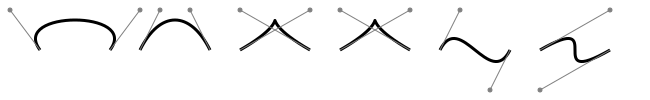

In [13]:
d = dw.Drawing(650,100)
pnt_1 = (40,50)
pnt_2 = (110,50)
ctl_1_x = (10,60,110,110,60,110)
ctls_2 = ((140,10),(90,10),(40,10),(40,10),(90,90),(40,90))

for i in range(6):
    trans = 'translate(%d,0)' % i*100
    p = dw.Path(stroke='black',fill='none',stroke_width=3,transform=trans)
    ctl_1 = (ctl_1_x[i],10)
    ctl_2 = ctls_2[i]
    p.M(*pnt_1)
    p.C(*ctl_1,*ctl_2,*pnt_2)
    d.append(p)
    g = dw.Group(stroke='gray',fill='gray',stroke_width=1,transform=trans)
    g.append(dw.Circle(*ctl_1,2))
    g.append(dw.Circle(*ctl_2,2))
    g.append(dw.Line(*pnt_1,*ctl_1))
    g.append(dw.Line(*pnt_2,*ctl_2))
    d.append(g)

d

Cubic Bézier with several segments

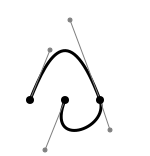

In [14]:
d = dw.Drawing(150,156)
pnt_1 = (30,100)
pnt_2 = (100,100)
pnt_3 = (65,100)
ctl_1 = (50,50)
ctl_2 = (70,20)
ctl_3 = (110,130)
ctl_4 = (45,150)

p = dw.Path(stroke='black',fill='none',stroke_width=3)
p.M(*pnt_1)
p.C(*ctl_1,*ctl_2,*pnt_2)
p.C(*ctl_3,*ctl_4,*pnt_3)
d.append(p)

g = dw.Group(stroke='gray',fill='gray',stroke_width=1)
g.append(dw.Line(*pnt_1,*ctl_1))
g.append(dw.Line(*pnt_2,*ctl_2))
g.append(dw.Line(*pnt_2,*ctl_3))
g.append(dw.Line(*pnt_3,*ctl_4))
d.append(g)

for pnt in (pnt_1,pnt_2,pnt_3):
    d.append(dw.Circle(*pnt,4))

for ctl in (ctl_1,ctl_2,ctl_3,ctl_4):
    d.append(dw.Circle(*ctl,2,stroke='gray',fill='gray'))

d

Smooth transition between curve segments is done via the `S` command (in analogy to the T command for quadratic curves. The first control point of the next segment will be constructed as reflection of the previous ending control point.

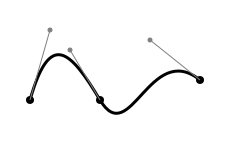

In [15]:
d = dw.Drawing(250,150)
pnt_1 = (30,100)
pnt_2 = (100,100)
pnt_3 = (200,80)
ctl_1 = (50,30)
ctl_2 = (70,50)
ctl_3 = (150,40)

p = dw.Path(stroke='black',fill='none',stroke_width=3)
p.M(*pnt_1)
p.C(*ctl_1,*ctl_2,*pnt_2)
p.S(*ctl_3,*pnt_3)
d.append(p)

for pnt,ctl in zip((pnt_1,pnt_2,pnt_3),(ctl_1,ctl_2,ctl_3)):
    d.append(dw.Circle(*pnt,4))
    d.append(dw.Circle(*ctl,2,stroke='gray',fill='gray'))
    d.append(dw.Line(*pnt,*ctl,stroke='gray'))

d

## 6.9 The `marker` Element HOWTO??

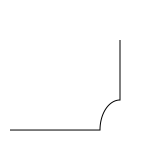

In [16]:
d = dw.Drawing(150,150,stroke='black',fill='none')

# line as path
p = dw.Path()
p.M(10,130)
p.L(100,130)
p.A(20,30,0,0,1,120,100)
p.L(120,40)

# circle at beginning

d.append(p)
d